# Hello, _nbpresent_!

In [ ]:
import nbpresent
nbpresent.__version__

# Using Python with LightTools - A Quick Start Guide
   - This is a brief introduction for how to use LightTools macros from Jupyter Notebook, using  Python language and .NET features
   - For full development environment, use winPython (spyder)
   - Jupyter Notebook is an excellent tool for presentations, trining, quick macros, etc.

# Install Anaconda
- The Anaconda installation includes the following packages we need
    - Python base package
    - numpy
    - scipy
    - matplotlib (includes pyplot library)
    - and many others
    
# Install Python for .NET
- This requires Framework 4.0
- This is where you can download the Python for .NET
    - http://www.lfd.uci.edu/~gohlke/pythonlibs/#pythonnet
    - Make sure to select the version that matches the version of Python you installed with Anaconda 
- Installation of the Python .NET
    - Open a DOS command prompt (cmd)
    - Change the directory to where you dounloaded the *.whl file
    - Enter the following command: pip install some-package.whl

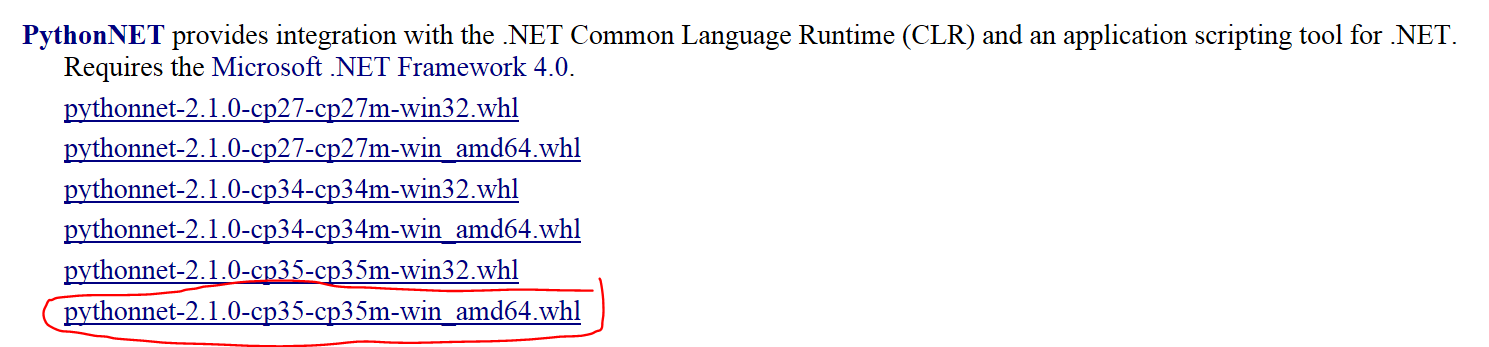

In [61]:
from IPython.display import Image
PATH="C:\\LightTools_All\\LTSupport_Temp\\"
Image(filename=PATH + 'PythonNetDownload.PNG',width=1000,height=200)

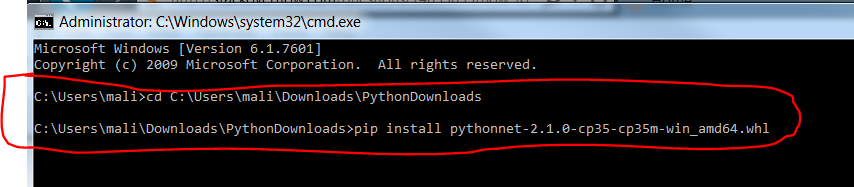

In [43]:
Image(filename=PATH + 'PythonNetInstall.PNG')

With Anaconda and Python for .NET installed, the installation is complete. The next step in writing a macro is to connect to the .NET librarries.
 - LTCOM64.dll installed under the \LightTools\Utilities.NET\ folder is what we need
 - Python NET provides the .NET access capabilities. The "import clr" statement below provides the System.Reflection capabilities in .NET
 - The LTCOM64 library contains the LTCOM64.LTAPIx and LTCOM64.JSNET2 (JumpStart library functions). The special nature of these functions is that they do not require any COM pointers
     - In the .NET interface, COM pointers are not allowed
     - COM aspects needed to interact with LightTools are automatically handled by the library

In [16]:
import clr
import System
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Make sure the path matches your installation!
clr.AddReference("C:\\Program Files\\Optical Research Associates\\LightTools 8.4.0\\Utilities.NET\\LTCOM64.dll")
from LTCOM64 import LTAPIx
lt0=LTAPIx()
#If PID capabilities (for multiple LightTools sessions) needed, use the PID for the session you want
#lt0.LTPID=12040
lt0.UpdateLTPointer
#If no PID is specified, connect to the first running session

<bound method 'UpdateLTPointer'>

# Sending a message to LightTools
- The message will appear in the Console Window, and the Macro Output tab

In [19]:
lt0.Message("Hello from Jupyter Notebook!")

0

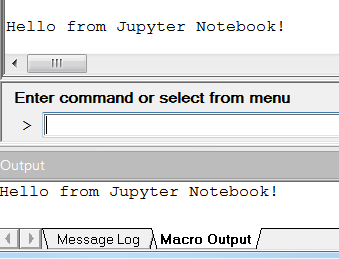

In [44]:
Image(filename=PATH + 'LTMessage.PNG',width=200,height=200)

# Sending a commands to LightTools
- The command below will:
    - set the focus to the 3D Window, and add a sphere
    - Get the name of the last created solid object
    - Set the radius of the last sphere to 10

In [30]:
#Set the focus to the 3D Window, pass a fixed command string to create a sphere with radius 5
lt0.Cmd("\V3D ctrsphere xyz 0,0,0 xyz 0,0,5")

0

# Send a command with Coord3() function
- The coord3() function will create a string in the format "XYZ x,y,z"

In [33]:
cmdstr="ctrsphere " + lt0.Coord3(0,0,0) + lt0.Coord3(0,0,5)
print(cmdstr) #so that we can see it
lt0.Cmd(cmdstr)    

ctrsphere XYZ 0,0,0 XYZ 0,0,5 


0

# Setting and getting data
- Following example shows how to use DbSet() and DbGet() functions to access data
    - Set the radius of the sphere primitive to 10
    - Get the radius to test whether the "set" worked correctly

In [39]:
#Set the radius to 10
key="Solid[@Last].Primitive[1]"
lt0.DbSet(key,"Radius",10)
r=lt0.DbGet(key,"Radius")
print("Radius of the sphere is: " + str(r))

Radius of the sphere is: 10.0


# Select, Copy, Boolean, Move
- Make a cylinder
- Subtract the cylinder from sphere
- Move the resulting solid to XYZ 0,10,10

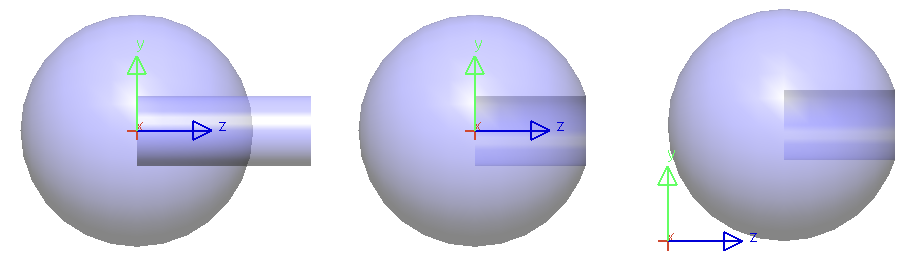

In [64]:
Image(filename = PATH + 'BooleanAndMove.PNG',width=500,height=100)

In [66]:
cmdstr="Cylinder " +lt0.Coord3(0,0,0) + " 3 15" #radius =3, length = 15
lt0.Cmd(cmdstr)
#Get the names of the objects. We have 2 objects
#Notice that we are using the "index" of each solid object
names=[]
for i in [1,2]:
    key="Solid[" + str(i) + "]"
    print("Current data key is: " + key) #so that we can see it
    names.append(lt0.DbGet(key, "Name"))
    print(names[i-1])

#Select two objects
lt0.Cmd("Select " + lt0.Str(names[0]) + " More " + lt0.Str(names[1]))
lt0.Cmd("Subtract")
#Resulting object has te name of the first selected object for boolean
lt0.Cmd("Select " + lt0.Str(names[0]))
lt0.Cmd("Move " + lt0.Coord3(0,10,10))

Current data key is: Solid[1]
Sphere_1
Current data key is: Solid[2]
Cylinder_19


0

# Access data in grids (1D and 2D)
- Access to data in grids is a slightly different process
- There are two types of data grids
    - 1D and 2D
- When accessing grid data, we need to use the two optional arguments in the DbGet() and DbSet() functions. Typically we omit these arguments for general data access

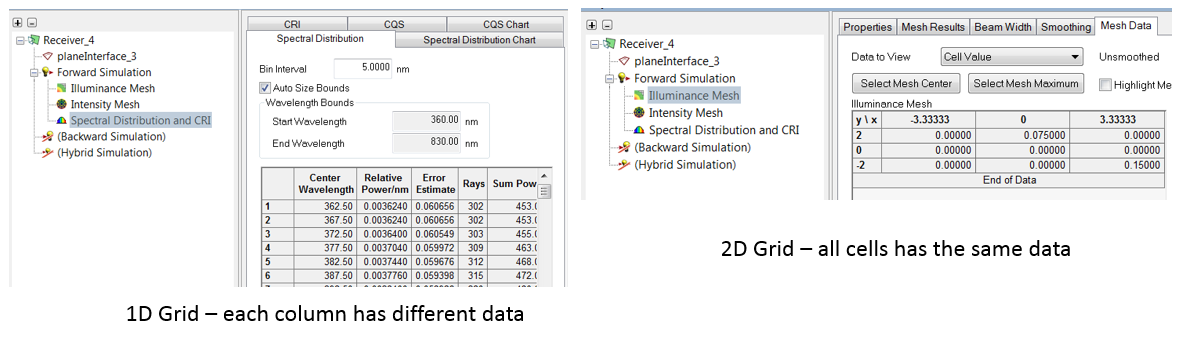

In [70]:
Image(filename= PATH + 'GridData.PNG',width=700,height=300)

# This is a function to retrieve data from a receiver mesh

In [17]:
def GetLTMeshParams(MeshKey,CellValueType):
    """Get the data from a receiver mesh.
    Parameters
    ----------
    MeshKey : String
        data access string for the receiver mesh
    CellValueType : data type to retrieve
    
    Returns
    -------
    X_Dimension
        Number of bins in X dimension
    Y_Dimension
        Number of bins in Y dimension
    Min_X_Bound
        Minimum X bound for the mesh
    Max_X_Bound
        Maximum X bound for the mesh
    Min_Y_Bound
        Minimum Y bound for the mesh
    Max_Y_Bound
        Maximum Y bound for the mesh
    Mesh_Data_Array
        An array of data, based on the cell value type requested
    
    Examples
    --------
        meshkey="receiver[1].Mesh[1]"    
        xdim,ydim,minx,maxx,miny,maxy,md=GetLTMeshParams(meshkey,"CellValue")
    """
    XDim=int(lt0.DbGet(MeshKey,"X_Dimension"))
    YDim=int(lt0.DbGet(MeshKey,"Y_Dimension"))
    MinX=lt0.DbGet(MeshKey,"Min_X_Bound")
    MaxX=lt0.DbGet(MeshKey,"Max_X_Bound")
    MinY=lt0.DbGet(MeshKey,"Min_Y_Bound")
    MaxY=lt0.DbGet(MeshKey,"Max_Y_Bound")
    dblArray=System.Array.CreateInstance(System.Double,XDim,YDim)
    [Stat,mData]=lt0.GetMeshData(MeshKey,dblArray,CellValueType)
    MeshData=np.ones((XDim,YDim))
    print(XDim,YDim)
    for i in range(0,XDim):
        for j in range(0,YDim):
            MeshData[i,j]=mData[i,j]
            #print(mData[i,j])
    MeshData=np.rot90(MeshData)
    return XDim,YDim,MinX,MaxX,MinY,MaxY,MeshData 


610 610


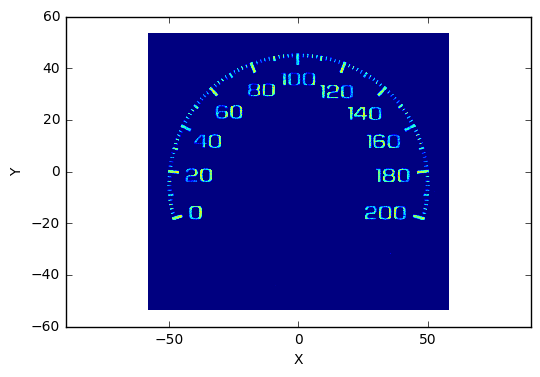

In [28]:
meshkey="receiver[1].Mesh[3]"    
xdim,ydim,minx,maxx,miny,maxy,md=GetLTMeshParams(meshkey,"CellValue")
cellx=np.linspace(minx,maxx,xdim+1)
celly=np.linspace(miny,maxy,ydim+1)
X,Y=np.meshgrid(cellx,celly)
plt.pcolormesh(X,Y,np.flipud(md),cmap="jet")
plt.axis("equal")
plt.xlabel("X")
plt.ylabel("Y")

# This is how you show a picture
- In order to show an animated gif, rename the gif to png
    - This appears to be a limitation/bug 

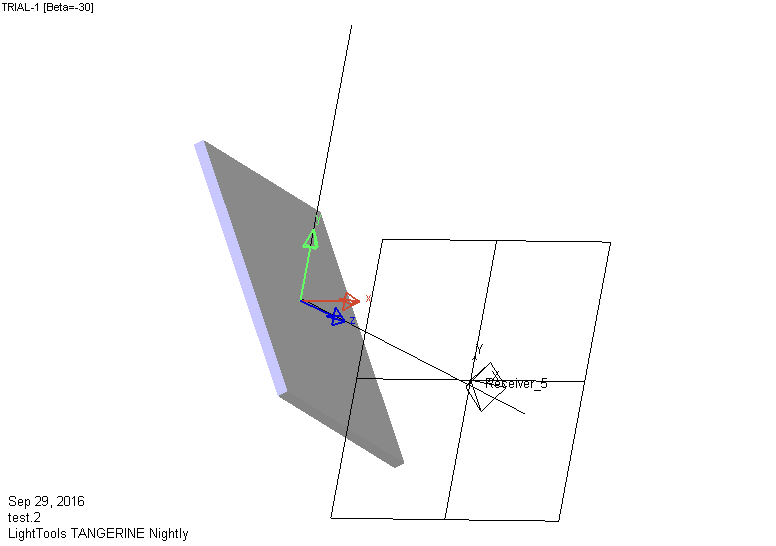

In [67]:
from IPython.display import Image
Image(filename=PATH + 'psu.png',width=500,height=500)

\begin{equation*}
P(E)   = {n \choose k} p^k (1-p)^{ n-k}
\end{equation*}


\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}



<html>
| This | is   |
|------|------|
|   a  | table|
</html>
